## Preparação dos dados

##### Importando bibliotecas gerais

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


##### Lendo os dados

In [9]:
df = pd.read_csv('koi_data.csv')
df.head()

,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,CONFIRMED,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,CONFIRMED,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,K00754.01,FALSE POSITIVE,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,K00755.01,CONFIRMED,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,K00114.01,FALSE POSITIVE,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948


##### Tratamento básico dos dados

In [10]:
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)
df = df.drop_duplicates()

number of duplicate rows:  (0, 43)


##### Confirmeds x False Positives

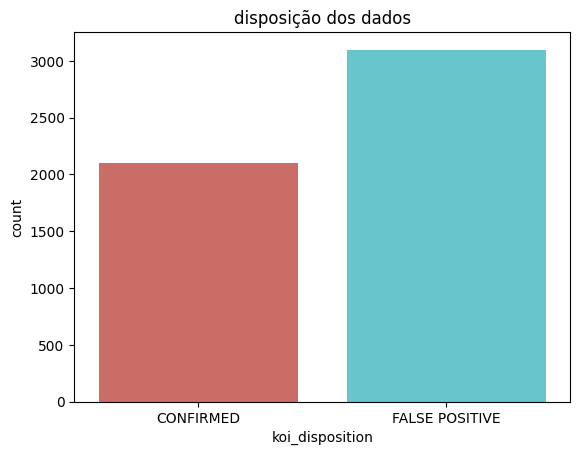

In [22]:
sns.countplot(x='koi_disposition', data=df, palette='hls')
plt.title('disposição dos dados')
plt.show()

## Métodos de classificação

#### Setup dos métodos de classificação

In [51]:
X = df.drop('koi_disposition', axis=1)
y = df['koi_disposition']

### Neive Bayes

In [128]:
from sklearn.naive_bayes import GaussianNB

In [127]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracyNB = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracyNB)

Acurácia: 0.792507204610951


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

##### Tamanho máximo: 3

In [106]:
max_depth = 3
classifier = DecisionTreeClassifier(max_depth=max_depth)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracy3)

Acurácia: 0.9241114313160422


##### Tamanho máximo: 5

In [107]:
max_depth = 5
classifier = DecisionTreeClassifier(max_depth=max_depth)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy5 = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracy5)

Acurácia: 0.9423631123919308


##### Tamanho máximo: 10

In [108]:
max_depth = 10
classifier = DecisionTreeClassifier(max_depth=max_depth)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy10 = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracy10)

Acurácia: 0.9433237271853987


##### Tamanho máximo: 15

In [109]:
max_depth = 15
classifier = DecisionTreeClassifier(max_depth=max_depth)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy15 = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracy15)

Acurácia: 0.9462055715658021


##### Tamanho máximo: 20

In [110]:
max_depth = 20
classifier = DecisionTreeClassifier(max_depth=max_depth)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy20 = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracy20)

Acurácia: 0.9462055715658021


##### Tamanho máximo: 50

In [111]:
max_depth = 50
classifier = DecisionTreeClassifier(max_depth=max_depth)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy50 = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracy50)

Acurácia: 0.9365994236311239


##### Altura ilimitada

In [113]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracyUnlimited = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracyUnlimited)

Acurácia: 0.9385206532180596


##### Comparação dos modelos

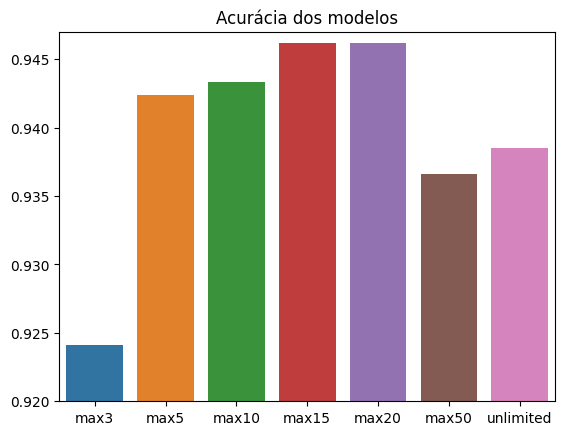

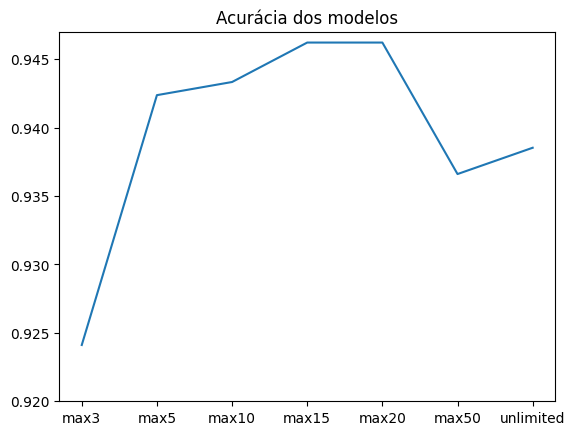

In [114]:
xaxis = ['max3','max5', 'max10', 'max15', 'max20', 'max50', 'unlimited']
yaxis = [accuracy3, accuracy5, accuracy10, accuracy15, accuracy20, accuracy50, accuracyUnlimited]
sns.barplot(x=xaxis, y=yaxis)
plt.title('Acurácia dos modelos')
plt.ylim(0.92, 0.947)
plt.show()

sns.lineplot(x=xaxis, y=yaxis)
plt.title('Acurácia dos modelos')
plt.ylim(0.92, 0.947)
plt.show()

### SVM

In [134]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score

In [136]:
scaler = StandardScaler()
Xscal = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xscal, y, test_size=0.2, random_state=42)

In [137]:
classifier_linear = SVC(kernel='linear')
classifier_rbf = SVC(kernel='rbf')

cv_scores_linear = cross_val_score(classifier_linear, X_train, y_train, cv=5)
cv_scores_rbf = cross_val_score(classifier_rbf, X_train, y_train, cv=5)

print("Acurácia média (Linear):", cv_scores_linear.mean())
print("Acurácia média (RBF):", cv_scores_rbf.mean())

classifier_linear.fit(X_train, y_train)
y_pred_linear = classifier_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Acurácia no conjunto de teste (Linear):", accuracy_linear)

classifier_rbf.fit(X_train, y_train)
y_pred_rbf = classifier_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Acurácia no conjunto de teste (RBF):", accuracy_rbf)

Acurácia média (Linear): 0.9502556791947547
Acurácia média (RBF): 0.9346350078492935
Acurácia no conjunto de teste (Linear): 0.9510086455331412
Acurácia no conjunto de teste (RBF): 0.9346781940441883


### k-NN

In [138]:
from sklearn.neighbors import KNeighborsClassifier

In [157]:
scaler = StandardScaler()
Xscalknn = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xscalknn, y, test_size=0.2, random_state=42)

#### K=3

In [158]:
k = 3 
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracyKNN3 = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracyKNN3)

Acurácia: 0.9058597502401537


#### K=5

In [159]:
k = 5 
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracyKNN5 = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracyKNN5)

Acurácia: 0.8962536023054755


#### K=10

In [160]:
k = 10 
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracyKNN10 = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracyKNN10)

Acurácia: 0.878001921229587


#### K=15

In [161]:
k = 15 
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracyKNN15 = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracyKNN15)

Acurácia: 0.8741594620557157


#### K=20

In [162]:
k = 20 
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracyKNN20 = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracyKNN20)

Acurácia: 0.8683957732949087


#### K=50

In [163]:
k = 50 
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracyKNN50 = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracyKNN50)

Acurácia: 0.8578290105667628


#### Comparação dos resultados

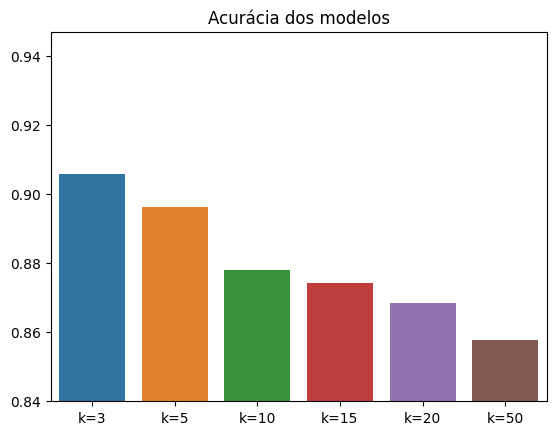

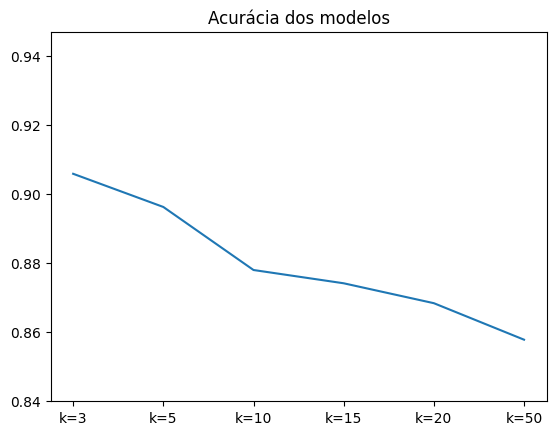

In [183]:
xaxis = ['k=3','k=5', 'k=10', 'k=15', 'k=20', 'k=50']
yaxis = [accuracyKNN3, accuracyKNN5, accuracyKNN10, accuracyKNN15, accuracyKNN20, accuracyKNN50]
sns.barplot(x=xaxis, y=yaxis)
plt.title('Acurácia dos modelos')
plt.ylim(0.84, 0.947)
plt.show()

sns.lineplot(x=xaxis, y=yaxis)
plt.title('Acurácia dos modelos')
plt.ylim(0.84, 0.947)
plt.show()

 ### Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier

#### Número de árvores = 100

In [166]:
n_estimators = 100
classifier = RandomForestClassifier(n_estimators=n_estimators)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracyRF100 = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracyRF100)


Acurácia: 0.968299711815562


#### Número de árvores = 200

In [167]:
n_estimators = 200
classifier = RandomForestClassifier(n_estimators=n_estimators)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracyRF200 = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracyRF200)

Acurácia: 0.968299711815562


#### Número de árvores = 500

In [168]:
n_estimators = 500 
classifier = RandomForestClassifier(n_estimators=n_estimators)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracyRF500 = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracyRF500)

Acurácia: 0.9702209414024976


#### Número de árvores = 700

In [169]:
n_estimators = 700 
classifier = RandomForestClassifier(n_estimators=n_estimators)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracyRF700 = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracyRF700)

Acurácia: 0.9692603266090298


#### Número de árvores = 1000

In [170]:
n_estimators = 1000 
classifier = RandomForestClassifier(n_estimators=n_estimators)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracyRF1000 = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracyRF1000)

Acurácia: 0.9673390970220941


#### Comparação dos resultados

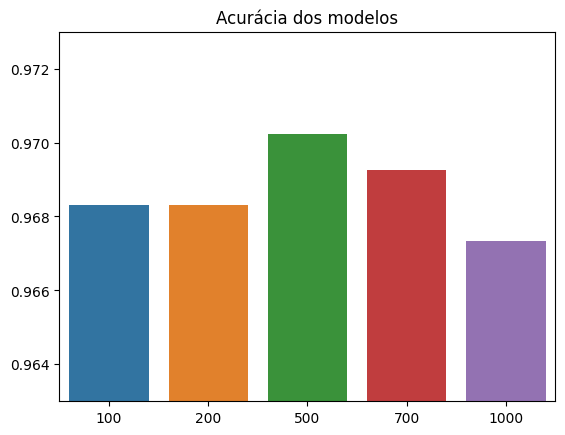

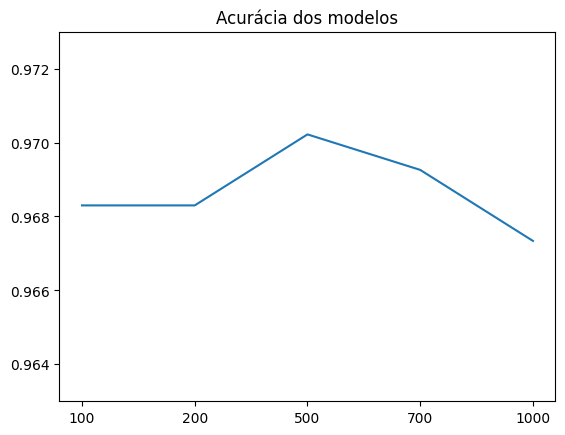

In [182]:
xaxis = ['100','200', '500', '700', '1000']
yaxis = [accuracyRF100, accuracyRF200, accuracyRF500, accuracyRF700, accuracyRF1000]
sns.barplot(x=xaxis, y=yaxis)
plt.title('Acurácia dos modelos')
plt.ylim(0.963, 0.973)
plt.show()

sns.lineplot(x=xaxis, y=yaxis)
plt.title('Acurácia dos modelos')
plt.ylim(0.963, 0.973)
plt.show()